<a href="https://colab.research.google.com/github/ctk03272/deeplearningstudy/blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. 합성곱 신경망
- 이번장의 주제는 합성만 신경곱(CNN) -> 이미지 인식과 음성 인식 등 다양한 곳에서 사용

## 7.1 전체 구조
- CNN도 레고 블록처럼 계층을 조합하여 사용
- 합성곱 계층과 롤링 계층이 새롭게 등장
- 지금까지의 신경망은 모든 뉴런이 결합되어 있었고 이를 완전연결이라고 하고, 완전히 연결된 계층을 Affine 계층이라고 했음
- CNN의 경우 Conv - ReLU - (Pooling) 흐름으로 연결됨 (풀링 계층은 생략 가능)
- 출력에 가까운 층에서는 Affine - ReLU 구성 사용 가능하며 마지막 출력에서는 Affine - Softmax 조합을 그대로 사용

## 7.2 합성곱 계층
- CNN에서는 패딩 스트라이등 고유 용어가 등장

### 7.2.1 완전연결 계층의 문제점
- 완전연결 계층의 문제점은 데이터의 형상이 무시된다는 점이다
- 예를들어 이미지는 3차원 형상이며, 형상에 공간적 정보가 담겨 있다. 그러나 완전연결 계층은 형상을 무시하고 모든 입력 데이터를 동등한 뉴런으로 취급하여 형상에 담긴 정보를 살릴 수 없음
- 합성곱 계층은 형상을 유지한다. 이미지 데이터를 3차원으로 입력받으며, 다음 계층에도 3차원으로 데이터를 전달
- 추ㅜ에서는 입력 데이터를 입력 특징 맵, 출력 데이터를 출력 특징 맵이라고 한다.


### 7.2.2 합성곱 연산
- 합성곱 연산은 이미지 처리에서 말하는 필터연산
- 문헌에 따라 필터를 커널이라 칭하기도 한다
- 합성곱 연산은 필터의 윈도를 일정 간격으로 이동해가며 입력 데이터에 적용한다
- 완전연결 신경망에는 가중치 매개변수와 편향이 존재하는데, CNN에서는 필터의 매개변수가 그동안의 가중치에 해당하며, 편향도 존재한다

### 7.2.3 패딩
- 합성곱 연산 수행 전 입력 데이터 주변을 특정 값으로 채우는 것을 패딩이라고 한다.
- 패딩은 주로 출력 크기를 조정할 목적으로 사요오딤

### 7.2.4 스트라이드
- 필터를 적용하는 위치의 간격을 스트라이드
- 스트라이드를 키우면 출력이 작아지고, 패딩을 크게 하면 출력 크기가 커진다
- 출력 크기는 정수여야 한다

### 7.2.5 3차원 데이터의 합성곱 연산
- 입력에티어의 채널 수와 필터의 채널 수가 같아야 한다.

### 7.2.6 블록으로 생각하기
- 합성곱 연산의 출력으로 다수의 채널을 내보내려면, 필터를 다수 사용하면 된다.

### 7.2.7 배치 처리
- 합성곱 연산도 마찬가지로 배치 처리를 지원합니다.


## 7.3 풀링 계층
- 가로 세로 방향의 공간을 줄이는 연산
- 최대 풀링 평균 풀링 등이 있음

### 7.3.1 풀링 계층의 특징
- 학습해야 할 매개변수가 없다
- 채널 수가 변하지 않는다.
- 입력의 변화에 영향을 적게 받는다

## 7.4 합성곱/풀링 계층 구현하기
### 7.4.1 4차원 배열


In [3]:
import numpy as np
x = np.random.rand(10,1,28,28)
x.shape

(10, 1, 28, 28)

In [4]:
x[0].shape

(1, 28, 28)

In [5]:
x[1].shape

(1, 28, 28)

In [6]:
x[0][0]

array([[4.52110216e-01, 7.53486298e-01, 9.11470862e-01, 9.29518695e-01,
        7.15554807e-02, 1.16063371e-01, 7.39244197e-01, 2.52493765e-01,
        1.58951385e-01, 3.69587362e-01, 8.89370368e-01, 6.54740681e-01,
        3.87621650e-03, 1.73923480e-01, 3.83655521e-01, 9.06880238e-01,
        5.45442876e-02, 3.74258799e-01, 9.56134065e-01, 3.78407116e-01,
        5.67078618e-01, 9.65050230e-01, 8.34473770e-01, 5.75703495e-01,
        7.43637451e-01, 2.32321314e-01, 4.13432747e-01, 5.50914134e-01],
       [6.62761838e-01, 6.33313567e-01, 1.34455202e-01, 9.51410223e-01,
        4.59248711e-01, 7.78226405e-01, 8.30329922e-01, 8.89985892e-01,
        8.53397417e-01, 2.81345394e-02, 2.63225203e-01, 6.06065484e-01,
        5.88757458e-01, 5.87750678e-01, 7.04108741e-01, 6.57536203e-01,
        3.27474928e-01, 7.46982564e-01, 7.03773145e-01, 1.13970156e-01,
        3.32033339e-01, 5.80205458e-01, 6.86404923e-01, 1.24787914e-01,
        1.47486386e-02, 4.24814425e-01, 8.06953277e-01, 8.03104

### 7.4.2 im2col로 데이터 전개하기
- 합성곱 연산을 곧이곧대로 구현하려면 for문이 여러개 필요
- for문 대신 im2col이라는 함수를 사용해 간단히 구현

In [11]:
from util import im2col

x1 = np.random.rand(1,3,7,7)
col1 = im2col(x1,5,5,stride=1,pad=0)
print(col1.shape)

x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2,5,5,stride=1,pad=0)
print(col2.shape)

(9, 75)
(90, 75)


In [12]:
class Convolution:
    def __inti__(self, w, b, stride=1, pad=0):
        self.w=w
        self.b=b
        self.stride=stride
        self.pad

    def forward(self, x):
        fn, c, fh, fw=self.w.shape
        n,c,h,w=x.shape
        out_h=int(1+(h+2*self.pad-fh)/self.stride)
        out_w=int(1+(w+2*self.pad-fw)/self.stride)

        col=im2col(x, fh, fw, self.stride, self.pad)
        col_w=self.w.reshape(fn, -1).T
        out=np.dot(col,col_w)+self.b

        out=out.reshpae(n, out_h, out_w, -1).transpose(0,3,1,2)

        return out

In [13]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H - self.pool_h) / self.stride)
    out_w = int(1 + (W - self.pool_w) / self.stride)

    # 전개 (1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1, self.pool_h*self.pool_w)

    # 최댓값 (2)
    out = np.max(col, axis=1)

    # 성형 (3)
    out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

    return out

풀링 계층은 다음의 세단계이다
1. 입력 데이터를 전개한다.
2. 행별 최대값을 구한다.
3. 적절한 모양으로 성형한다.

In [18]:
# coding: utf-8
import sys, os
import pickle
import numpy as np
from collections import OrderedDict
from layers import *
from gradient import numerical_gradient


class SimpleConvNet:
    """단순한 합성곱 신경망

    conv - relu - pool - affine - relu - affine - softmax

    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """기울기를 구한다（수치미분）.

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).

        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블

        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.001574577812952196
train loss:0.005072132769071111
train loss:0.003931319203366165
train loss:0.00030053704114715743
train loss:0.04520950126988189
train loss:0.09654554799413419
train loss:0.003131620545215487
train loss:0.00241113985612563
train loss:0.0008735860616658293
train loss:0.019146470504993775
train loss:0.012289558136927257
train loss:0.002145707643157784
train loss:0.0038727332183360465
train loss:0.0036522275235960438
train loss:0.004075366614102789
train loss:0.028449807600529887
train loss:0.009172772336530499
train loss:0.014630087505723281
train loss:0.010401092269992952
train loss:0.0008728146401218182
train loss:0.002188233184014461
train loss:0.002399457435226728
train loss:0.005541330246342707
train loss:0.0034914204355686574
train loss:0.013590476497155342
train loss:0.0005204222964053689
train loss:0.003105074800148667
train loss:0.003013543201644791
train loss:0.004041894060130521
train loss:0.002468352113664891

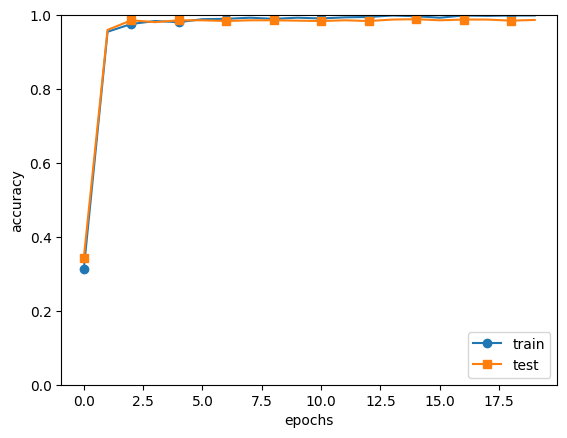

In [25]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from mnist import load_mnist
from trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28),
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 합성곱 계층과 풀링 계층은 이미지 인식에 필수적인 모듈이다

## 7.6 CNN 시각화 하기

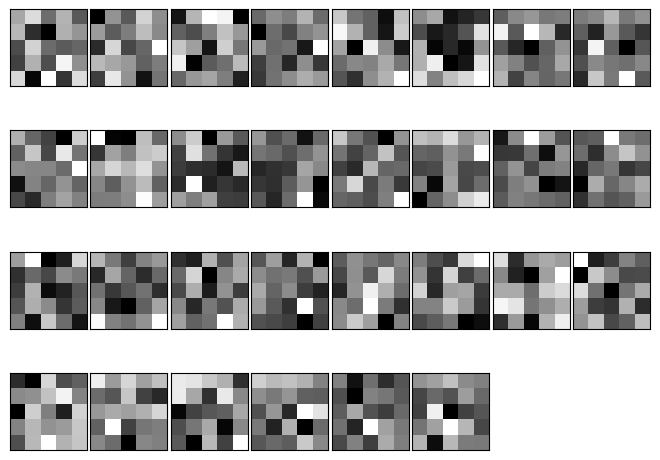

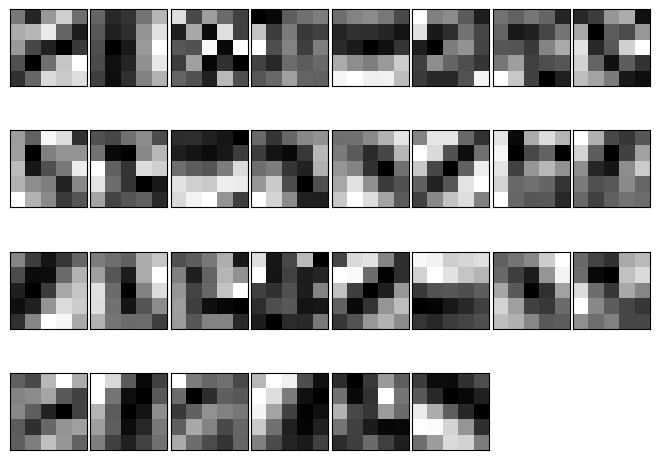

In [26]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

### 7.6.1 1번째 층의 가중치 시각화하기
- 학습 전 필터는 무작위고 규칙성이 없었는데, 학습 후에는 규칙성있는 이미지가 되었다
- 학습된 필터에서 필터1은 세로 에지에 필터2는 가로에지에 반응한다.
- 이처럼 합성곱 계층의 필터는 에지나 블롭 등의 원시적인 정보를 추출할 수 있다. 이런 정보가 뒷단 계층에 절달되는 것이 앞서 구현한 CNN에서 일어나는 일이다.

### 7.6.2 층 깊이에 따른 추출 정보 변화
- 연구 결과에 따르면 계층이 깊어질수록 추출되는 정보는 더 추상화 된다.
- 층이 깊어지면서 뉴런이 반응하는 대상이 단수한 모양에서 고급 정보로 변화되고, 의미를 이해하도록 변화 된다.

## 7.7 대표적인 CNN
### 7.7.1 LeNet
- LeNet은 손글씨 숫자를 인식하는 네트워크이다.
- 현재의 CNN과 비교하면 활성화 함수의 차이가 있다.

### 7.7.2 AlextNet
- 활성화 함수로 ReLU함수 사용
- LRN이라는 국소적 정규화를 실시하는 계층 이용
- 드롭아웃을 사용한다.